## Ⅰ. Linear Layer

신경망은 선형 모델과 비선형 모델의 결합으로 이루어져 있다. Linear Layer는 이름에서 유추할 수 있듯이 선형 모델이며 Weight $\mathbf{W}$ 와 bias $\mathbf{b}$ 의 행렬 연산으로 output을 출력한다.

$$
\mathbf{y} = \mathbf{x \cdot W} + \mathbf{b}
$$

In [4]:
class LinearLayer:
    
    def __init__(self, w, b):
        self.w = np.array(w)
        self.b = np.array(b)

    def forward(self, x):
        return np.dot(x, self.w) + self.b

x = [1.0, 0.5]
w = [[0.1, 0.3, 0.5],
     [0.2, 0.4, 0.6]]
b = [0.1, 0.2, 0.3]

linear = LinearLayer(w, b)
linear.forward(x)

array([0.3, 0.7, 1.1])

## Ⅱ. Activation function

Linear Layer만 여러층을 쌓는 것은 큰 의미가 없다. 따라서 비선형함수를 합성하여 쓰는데 이를 activation function이라고 한다.

### 1. sigmoid 함수

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

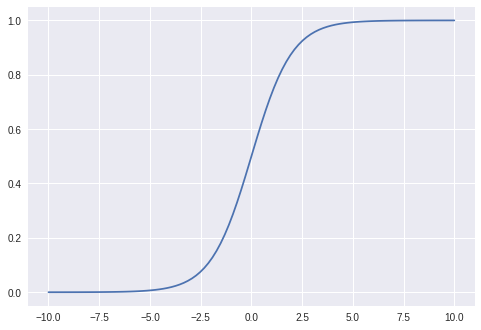

In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 100)
y = sigmoid(x)

plt.plot(x, y)
plt.show()

### 2. tanh 함수

$$
\sigma(x) = \frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}
$$

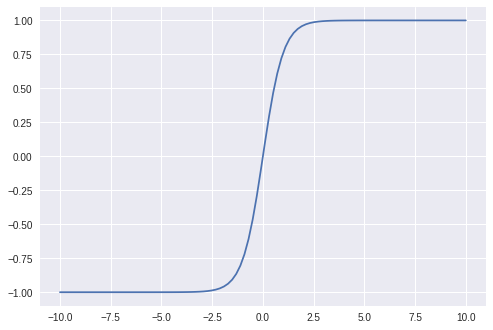

In [7]:
def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

x = np.linspace(-10, 10, 100)
y = tanh(x)

plt.plot(x, y)
plt.show()

### 3. ReLU function

Sigmoid와 Tanh 함수는 역사적으로 많이 쓰였던 활성화 함수지만 오늘날에는 ReLU 함수가 가장 많이 사용되고 있다.

$$
\sigma(x) =
  \begin{cases}
    0  & \quad (x \leq 0) \\
    x  & \quad (x \gt 0)
  \end{cases}
$$

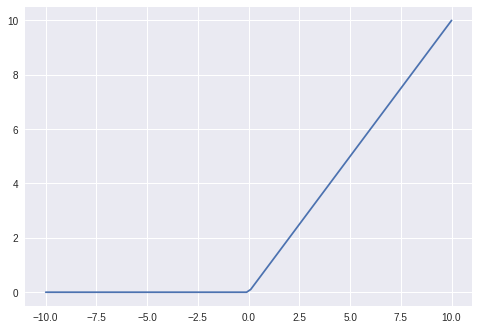

In [8]:
def ReLU(x):
    return np.maximum(0, x)

x = np.linspace(-10, 10, 100)
y = ReLU(x)

plt.plot(x, y)
plt.show()

### 4. Softmax function

분류문제에서 마지막단에 쓰이는 함수로 모델의 출력을 확률로 해석할수 있게 변환해준다. 소프트맥스 함수는 원소의 대소 관계를 변화시키지 않기 때문에 loss계산에만 쓰고 predict에선 생략가능하다.

$$
y_k = \frac{\displaystyle\text{exp}(a_k)}{\displaystyle\sum_{i=1}^{n}\text{exp}(a_i)}
$$

In [9]:
def softmax(x):
    max_x = np.max(x)
    exp = np.exp(x - max_x)
    return exp/exp.sum()

softmax([1010, 1000, 990])

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])